<a href="https://colab.research.google.com/github/SkyJoyTianle/python/blob/master/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第四章

In [ ]:
!pip install quadprog

In [ ]:
#!pip install cvxopt

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import quadprog
#from cvxopt import solvers
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

In [ ]:
def alpha(k, x, y):
    n = len(x)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = k(x[i], x[j])
    return np.linalg.inv(K + 10e-5 * np.identity(n)).dot(y)

例63

In [ ]:
def k_p(x, y):
    return (np.dot(x.T, y) + 1)**3

def k_g(x, y):
    return np.exp(-(x - y)**2 / 2)

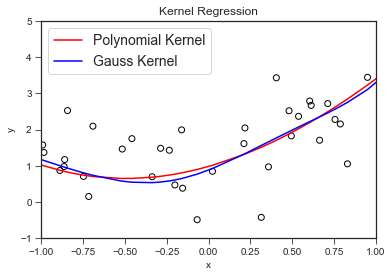

In [ ]:
lam = 0.1
n = 50; x = np.random.randn(n); y = 1 + x + x**2 + np.random.randn(n)
alpha_p = alpha(k_p, x, y)
alpha_g = alpha(k_g, x, y)

z = np.sort(x); u = []; v = []

for j in range(n):
    S = 0
    for i in range(n):
        S = S + alpha_p[i] * k_p(x[i], z[j])
    u.append(S)
    S = 0
    for i in range(n):
        S = S + alpha_g[i] * k_g(x[i], z[j])
    v.append(S)

plt.scatter(x, y, facecolors='none', edgecolors = "k", marker = "o")
plt.plot(z, u, c = "r", label = "Polynomial Kernel")
plt.plot(z, v, c = "b", label = "Gauss Kernel")
plt.xlim(-1, 1)
plt.ylim(-1, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend(loc = "upper left", frameon = True, prop={'size':14})

例　64

In [ ]:
def alpha(k, x, y):
    n = len(x)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = k(x[i], x[j])
    return np.linalg.inv(K + lam * np.identity(n)).dot(y)

In [ ]:
def k_p(x, y):
    return (np.dot(x.T, y) + 1)**3

def k_g(x, y):
    return np.exp(-(x - y)**2 / 2)

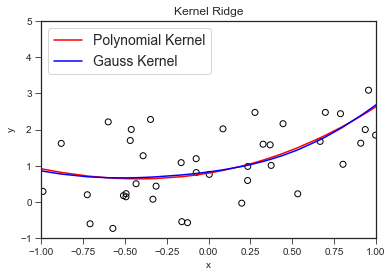

In [ ]:
lam = 0.1
n = 50; x = np.random.randn(n); y = 1 + x + x**2 + np.random.randn(n)
alpha_p = alpha(k_p, x, y)
alpha_g = alpha(k_g, x, y)

z = np.sort(x); u = []; v = []

for j in range(n):
    S = 0
    for i in range(n):
        S = S + alpha_p[i] * k_p(x[i], z[j])
    u.append(S)
    S = 0
    for i in range(n):
        S = S + alpha_g[i] * k_g(x[i], z[j])
    v.append(S)
plt.scatter(x, y, facecolors='none', edgecolors = "k", marker = "o")
plt.plot(z, u, c = "r", label = "Polynomial Kernel")
plt.plot(z, v, c = "b", label = "Gauss Kernel")
plt.xlim(-1, 1)
plt.ylim(-1, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Ridge")
plt.legend(loc = "upper left", frameon = True, prop={'size':14})

Kernel PCA

In [ ]:
def kernel_pca_train(x, k):
    n = x.shape[0]
    K = np.zeros((n, n))
    S = [0] * n; T = [0] * n
    for i in range(n):
        for j in range(n):
            K[i, j] = k(x[i, :], x[j, :])
    for i in range(n):
        S[i] = np.sum(K[i, :])
    for j in range(n):
        T[j] = np.sum(K[:, j])
    U = np.sum(K)
    for i in range(n):
        for j in range(n):
            K[i, j] = K[i, j] - S[i] / n - T[j] / n + U / n**2
    val, vec = np.linalg.eig(K)
    idx = val.argsort()[::-1]  # decreasing order as R
    val = val[idx]
    vec = vec[:,idx]
    alpha = np.zeros((n, n))
    for i in range(n):
        alpha[:, i] = vec[:, i] / val[i]**0.5
    return alpha

def kernel_pca_test(x, k, alpha, m, z):
    n = x.shape[0]
    pca = np.zeros(m)
    for i in range(n):
        pca = pca + alpha[i, 0:m] * k(x[i, :], z)
    return pca

例　65

PCA(n_components=4)
[[  64.80216368   11.4480074 ]
 [  92.82745016   17.9829427 ]
 [ 124.06821629   -8.83040304]
 [  18.34003541   16.70391138]
 [ 107.42295313  -22.52006977]
 [  34.97598596  -13.71958403]
 [ -60.88728193  -12.93253016]
 [  66.73102545   -1.3537978 ]
 [ 165.24437032   -6.27469007]
 [  40.53517659    7.29023959]
 [-123.53610577  -24.29120791]
 [ -51.79700225    9.46919099]
 [  78.9920973   -12.89706046]
 [ -57.55096073   -2.84626471]
 [-115.5867897     3.3421305 ]
 [ -55.78969411   -3.15723392]
 [ -62.38318061   10.67327147]
 [  78.27763132    4.2949175 ]
 [ -89.26104427   11.4878272 ]
 [ 129.3301355     5.00703148]
 [ -21.26628263  -19.45017903]
 [  85.45152667   -5.9045567 ]
 [ -98.95481552   -5.20960058]
 [  86.85635769   27.42841963]
 [   7.98628867   -5.2756414 ]
 [ -62.4836353     9.51050205]
 [ -69.09654435    0.21119592]
 [  83.61357844  -15.1021839 ]
 [-114.7773545     4.73455836]
 [ -10.81572512  -23.13733887]
 [ 114.8681626     0.3364531 ]
 [  84.29423052  -1

<ipython-input-10-17b483c793e2>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  alpha[:, i] = vec[:, i] / val[i]**0.5


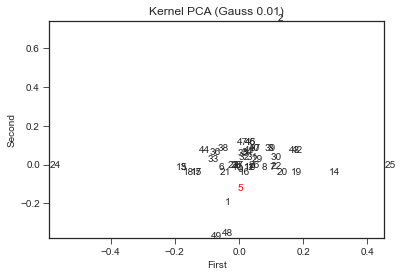

In [ ]:
# def k(x, y):
#     return np.dot(x.T, y)
sigma2 = 0.01

def k(x, y):
    return np.exp(-np.linalg.norm(x - y)**2 / 2 / sigma2)

X = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')
x = X.values[:,:-1]
n = x.shape[0]; p = x.shape[1]
alpha = kernel_pca_train(x, k)
z = np.zeros((n, 2))

for i in range(n):
    z[i, :] = kernel_pca_test(x, k, alpha, 2, x[i, :])

min1 = np.min(z[:, 0]); min2 = np.min(z[:, 1])
max1 = np.max(z[:, 0]); max2 = np.max(z[:, 1])

plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xlabel("First")
plt.ylabel("Second")
plt.title("Kernel PCA (Gauss 0.01)")
for i in range(n):
    if i != 4:
        plt.text(x = z[i, 0], y = z[i, 1], s = i)
plt.text(z[4, 0], z[4, 1], 5, c = "r")

# general
pca = PCA(n_components=X.shape[1]-1)
print(pca.fit(x))
X1=pca.fit_transform(x)
print(X1[:,:2])

例　66

In [ ]:
def K_linear(x, y):
    return np.dot(x.T, y)

def K_poly(x, y):
    return (1 + np.dot(x.T, y))**2

def svm2(X, y, C, K):
    eps = 0.0001
    n = X.shape[0]
    Dmat = np.zeros((n, n))
    Kmat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            Dmat[i, j] = K(X[i, :], X[j, :]) * y[i] * y[j]
            Kmat = K(X[i, :], X[j, :])
    Dmat = Dmat + eps * np.identity(n)
    Dmat = Dmat.astype("double")
    dvec = np.array([1] * n)
    dvec = dvec.astype("double")
    Amat = np.zeros((2*n+1, n))
    Amat[0, :] = y; Amat[1: (n+1), 0:n] = -np.identity(n)
    Amat[(n+1):(2*n+1), 0:n] = np.identity(n)
    Amat = Amat.T
    Amat = Amat.astype("double")
    bvec = np.array([0] + [-C] * n + [0] * n).astype("double")
    alpha, f, xu, iter, lar, iact = quadprog.solve_qp(G = Dmat, a = dvec, C = Amat, b = bvec, meq = 1)
    index = [i for i in range(n) if (0 < alpha[i]) & (alpha[i] < C)]
    beta = np.squeeze(np.array(Kmat).dot(alpha * y))
    beta_0 = np.mean(y[index] - beta[index])
    return {"alpha": alpha, "beta_0": beta_0}

# Definition
def plot_kernel(K, line):
    qq = svm2(X, y, 0.1, K); alpha = qq["alpha"]; beta_0 = qq["beta_0"]
    def f(u, v):
        x = [u] + [v]; S = beta_0
        for i in range(n):
            S = S + alpha[i] * y[i] * K(X[i, :], x)
        return S
    u = np.arange(-2, 2.1, 0.1); v = np.arange(-2, 2.1, 0.1)
    w = np.zeros((41, 41))
    for i in range(41):
        for j in range(41):
            w[i, j] = f(u[i], v[j])
    plt.contour(u, v, w, levels = 0, linestyles = line)

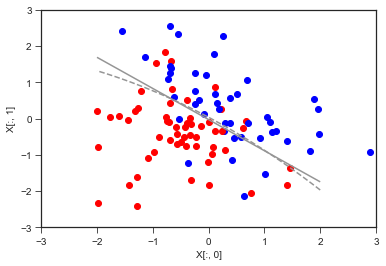

In [ ]:
np.random.seed(31)
a = np.random.randn(1)
b = np.random.randn(1)
n = 100
X = np.random.randn(n*2).reshape(n, 2)
y = np.sign(a * X[:, 0] + b * X[:, 1] \
            + 0.3 * np.random.randn(n))
plt.figure()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("X[:, 0]")
plt.ylabel("X[:, 1]")
for i in range(n):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], c = "r")
    else:
        plt.scatter(X[i, 0], X[i, 1], c = "b")
plot_kernel(K_linear, "solid")
plot_kernel(K_poly, "dashed")

In [ ]:
#help(plt.contour)

例 67

In [ ]:
# define the function of d,h as basis
def d(j, x, knots):
    K = len(knots)
    return (np.maximum((x-knots[j])**3, 0)
    - np.maximum((x-knots[K-1])**3,0))/(knots[K-1]-knots[j])

def h(j, x, knots):
    K = len(knots)
    if j == 0:
        return 1
    elif j == 1:
        return x
    else:
        return d(j-1, x, knots)-d(K-2, x, knots)

def G(x):
    n = len(x)
    g = np.zeros((n, n))
    for i in range(2, n-1):
        for j in range(i, n):
            g[i, j] = 12*(x[n-1]-x[n-2])*(x[n-2]-x[j-2])\
                      *(x[n-2]-x[i-2])/(x[n-1]-x[i-2])/\
            (x[n-1]-x[j-2])+(12*x[n-2]+6*x[j-2]-18*x[i-2])\
            *(x[n-2]-x[j-2])**2/(x[n-1]-x[i-2])/(x[n-1]-x[j-2])
            g[j, i] = g[i, j]
    return g

Text(0.5, 1.0, 'smooth spline (n=100)')

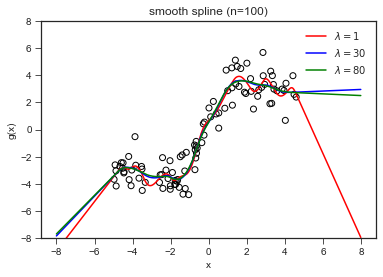

In [ ]:
n = 100
x = np.random.uniform(-5, 5, n)
y = x + np.sin(x)*2 + np.random.randn(n)
index = np.argsort(x)
x = x[index]; y = y[index]
X = np.zeros((n, n))
X[:, 0] = 1
for j in range(1, n):
    for i in range(n):
        X[i, j] = h(j, x[i], x)
GG = G(x)
lam_set = [1, 30, 80]
col_set = ["red", "blue", "green"]

plt.figure()
plt.ylim(-8, 8)
plt.xlabel("x")
plt.ylabel("g(x)")

for i in range(3):
    lam = lam_set[i]
    gamma = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+lam*GG),X.T),y)
    def g(u):
        S = gamma[0]
        for j in range(1, n):
            S = S + gamma[j]*h(j, u, x)
        return S
    u_seq = np.arange(-8, 8, 0.02)
    v_seq = []
    for u in u_seq:
        v_seq.append(g(u))
    plt.plot(u_seq, v_seq, c = col_set[i], label = "$\lambda = %d$"%lam_set[i])
plt.legend()
plt.scatter(x, y, facecolors='none', edgecolors = "k", marker = "o")
plt.title("smooth spline (n=100)")
